In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import warnings


warnings.filterwarnings('ignore')

In [2]:
url = 'marketing_customer_analysis_clean.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [4]:
df = df.drop(columns =  ['unnamed:_0',"customer", "effective_to_date"], axis=1)

In [5]:
categoricals = df.select_dtypes(include=object)
numericals = df.select_dtypes(include = np.number)

In [6]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

In [7]:
enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc = OrdinalEncoder(categories=[["High School or Below", "College", "Bachelor","Master", "Doctor"]])

ordinals["education"] = enc.fit_transform(ordinals[["education"]])

enc = OrdinalEncoder(categories=[["Small","Medsize","Large"]])

ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

In [8]:
nominals = pd.get_dummies(nominals)

In [9]:
numericals = df.select_dtypes(include='number')


In [10]:
final_df = pd.concat([numericals,ordinals,nominals], axis=1)

<AxesSubplot: >

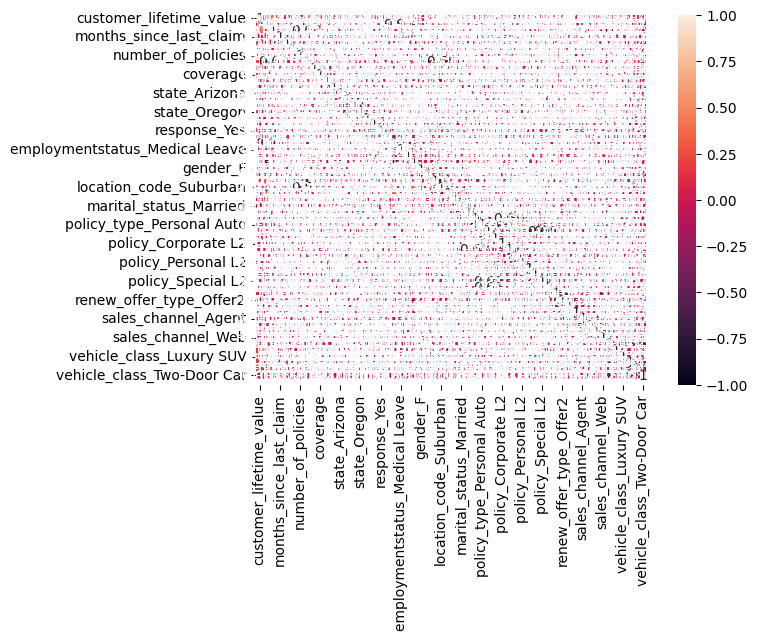

In [11]:
sns.heatmap(final_df.corr(), annot=True)

## Splitting and Scalling

In [12]:
X = final_df.drop(columns=['total_claim_amount'], axis = 1)
y = final_df[['total_claim_amount']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = MinMaxScaler()
std_scaler = StandardScaler()
pt = PowerTransformer()

std_scaler.fit(X_train)
scaler.fit(X_train)
pt.fit(y_train)

PowerTransformer()

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

In [17]:
y_train = pt.transform(y_train)
y_test = pt.transform(y_test)

In [18]:
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}\n\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (8728, 58)
y_train: (8728, 1)

X_test: (2182, 58)
y_test: (2182, 1)


In [19]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns=y.columns)
y_test = pd.DataFrame(y_test, columns=y.columns)

In [20]:
# y_test.hist(bins=8, grid=False, figsize=(3,3))
# plt.tight_layout()
# plt.show()

## Varicance Threshold 

In [21]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features


X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold() # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()


Initial number of numerical columns:  (8728, 58)

Final number of numerical columns:  (8728, 57)



In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()


## RFE 
# selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
# selector.fit(X_train, y_train)

# kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
# kept_features = list(X_train.iloc[:,kept_features].columns)

# X_train = selector.transform(X_train)
# X_test  = selector.transform(X_test)

# X_train = pd.DataFrame(X_train, columns=kept_features)
# X_test  = pd.DataFrame(X_test, columns=kept_features)

# print("Final selected features: ")
# display(X_train)

In [23]:
# sns.heatmap(X_train.corr(), annot=True)

In [24]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.8329150110980545, Test -> 0.8327185800023242


In [25]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.01)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.8093218092233656, Test -> 0.8059882185072916


In [26]:
model=Ridge(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.828955628427415, Test -> 0.8296730488799808


In [27]:
model=ElasticNet(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.8329743897598209, Test -> 0.8325629341217926


##### Define a function that takes a list of models and trains (and tests) them so we can try a lot of them without repeating code.


Defining a function to bundle all in one process

In [28]:
alpha=0.3254523

def model_trainer(lst_models):
    
    for model in lst_models:
        # model = model(alpha=alpha)
        model.fit(X_train, y_train)
        print(f'{model.__class__.__name__}:\nTrain score: {model.score(X_train, y_train)}\nTest score: {model.score(X_test, y_test)}\n')
    
lasso = Lasso(alpha=alpha)
en = ElasticNet(alpha=alpha)
ridge = Ridge(alpha=alpha)

lst = [lasso, ridge, en]

model_trainer(lst)

Lasso:
Train score: 0.4432623072447879
Test score: 0.4575111879216577

Ridge:
Train score: 0.8132333147608803
Test score: 0.8090468923201666

ElasticNet:
Train score: 0.5846439166215371
Test score: 0.5913371719899161



Use feature selection techniques (P-Value, RFE) to select a subset of features to train the model with (if necessary).


In [29]:
from sklearn.feature_selection import RFE


selector = RFE(lm, n_features_to_select=5, step=1)

# Fit the RFE model to the data
selector = selector.fit(X, y)

In [30]:
# Print the ranking of each feature
print("Feature Ranking:", selector.ranking_)

# Print the selected features
selected_features = [f"Feature {i+1}" for i in range(len(selector.support_)) if selector.support_[i]]
print("Selected Features:", selected_features)

Feature Ranking: [53 52 27 47 51 37 43 50  3 28 40 23 44 41 26 32 16  9 22 13 35 12  4 19
 15  1  1 14 11 10  7 31 33 20 46 21 42 34 30 29  8 18 24 25 17 48 36 39
 49 38 45  2  1  1  6  5  1 54]
Selected Features: ['Feature 26', 'Feature 27', 'Feature 53', 'Feature 54', 'Feature 57']


In [35]:
def feature_selection_pvalue(X, y, significance_level=0.05):
    # Add a constant term (intercept) to the feature matrix X
    X = sm.add_constant(X)
    # Fit a linear regression model using Ordinary Least Squares
    model = sm.OLS(y, X).fit()
    # Extract p-values for each coefficient, excluding the constant term
    p_values = model.pvalues[1:]  # Exclude the constant term
     # Select features whose p-values are less than the specified significance level
    selected_features = X.columns[1:][p_values < significance_level]
    # Return the list of selected features
    return selected_features
# Use case:
selected_features_pvalue = feature_selection_pvalue(X, y)
# Print or display the selected features
print("Selected Features based on P-value:")
print(selected_features_pvalue) 

Selected Features based on P-value:
Index(['income', 'monthly_premium_auto', 'months_since_last_claim', 'coverage',
       'education', 'state_Arizona', 'state_California', 'state_Oregon',
       'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Retired',
       'employmentstatus_Unemployed', 'gender_F', 'gender_M',
       'location_code_Rural', 'location_code_Suburban', 'location_code_Urban',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'policy_type_Corporate Auto',
       'policy_type_Personal Auto', 'policy_Corporate L2',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'renew_offer_type_Offer1', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_type_A'],
      dtype='object'